In [ ]:
import torchaudio
from transformers import HubertModel
from sklearn.metrics import PrecisionRecallDisplay

In [ ]:
# use hubert from HF for feature embedding
model = HubertModel.from_pretrained("facebook/hubert-base-ls960")
arr, sr = torchaudio.load("my_audio.wav")
if sr != 16_000:
    arr = torchaudio.functional.resample(arr, sr, 16_000)
# use intermediate layer
hidden_state = model(arr[None], output_hidden_states=True).hidden_states[6]
# take mean over time
feats = hidden_state.detach().cpu().numpy().squeeze().mean(0)

In [ ]:
# load sk-learn classifier from here: https://dl.suno-models.io/bark/models/v0/classifier.pkl
with open("classifier.pkl", "rb") as f:
    clf = pickle.load(f)

### Precision-recall curve on test set

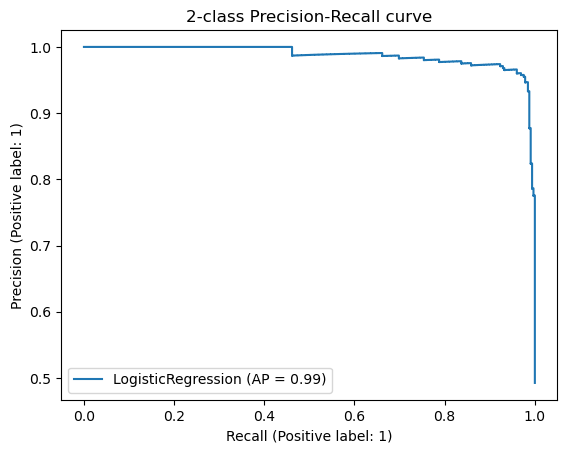